<a href="https://colab.research.google.com/github/leekate/2020-ctrc-OralCancer-Classification-project/blob/master/Oral_Detect_mean_shiftAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean-shift Algorithm


**Mean-shift는 데이터 포인트의 밀도를 기반으로 연속적으로 밀도가 높은 지점으로 이동하는 통계적 기법이다.** 이미지에 도입하면 군집화가 가능하다. 

주어진 데이터 포인트 세트에서 알고리즘은 각 데이터 포인트를 가장 가까운 군집의 센터로 반복적으로 할당한다. 가장 가까운 군집의 중심으로의 방향은 가장 많은 점들이 몰려있는 곳으로 결정되고 결국 **데이터 포인터들이 가장 많은 점들이 몰려있는 곳으로 (군집 중심으로) 이동한다.**

k-means와는 다르게 Mean-shift는 사전에 클러스터의 개수를 미리 결정할 필요가 없고 데이터를 바탕으로 클러스터의 개수를 계산한다.



https://m.blog.naver.com/PostView.nhn?blogId=khm159&logNo=221957008023&proxyReferer=https:%2F%2Fblog.naver.com%2Fkhm159%2F221957008023


http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/


In [1]:
import numpy as np
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import os 
import cv2

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# print(os.getcwd())
# pylab.rcParams['figure.figsize']=16,12

In [3]:
# img=Image.open('/content/drive/Shareddrives/CTRC-OralDetect-Project/Original/train/1.Cancer/can_100.jpg')
img=cv2.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/Original/train/1.Cancer/can_100.jpg')

img=np.array(img)
original_shape=img.shape

In [4]:
print(img.shape)
print(original_shape)

(294, 294, 3)
(294, 294, 3)


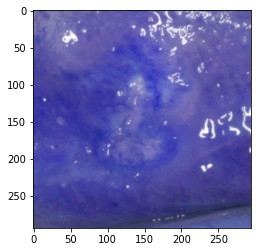

In [5]:
img_show=np.reshape(img,[-1,3])
plt.imshow(img)

In [6]:
print(img_show.shape)

(86436, 3)


In [7]:
# cancer image를 segmentation
bandwidth=estimate_bandwidth(img_show,quantile=0.1,n_samples=100)
print(bandwidth)

18.118979248274314


In [8]:
# 대역폭 계산
ms=MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(img_show)

MeanShift(bandwidth=18.118979248274314, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [9]:
# MeanShift 계산
labels=ms.labels_
print("labels.shape:",labels.shape)

cluster_centers=ms.cluster_centers_
print("cluster_centers.shape:",cluster_centers.shape)
 
labels_unique=np.unique(labels)
n_clusters_=len(labels_unique)
print("Number of estinmated clusters: %d" %n_clusters_) #만들어진 군집의 갯수

labels.shape: (86436,)
cluster_centers.shape: (6, 3)
Number of estinmated clusters: 6


(-0.5, 293.5, 293.5, -0.5)

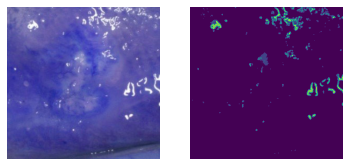

In [11]:
segmented_img=np.reshape(labels,original_shape[:2])
# 사이즈만! RGB채널은 무시!

plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_img)
plt.axis('off')

이렇게 하고싶었는데..
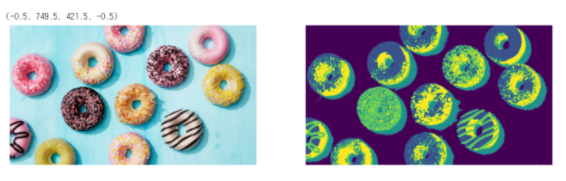